### Importing the necessary libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Importing Data

In [2]:
# open the csv file and read it
data = pd.read_csv('diabetes_data_upload.csv')

### Exploratory data analysis (EDA)

In [3]:
# plotting the counts in respect to Gender, Obesity and class
fig1 = px.sunburst(data, path=['Gender','Obesity', 'class'], width=500, height=500, title='Gender-Obesity-Class')
fig1.show()

In [4]:
#  plotting  class in respect to Gender and Age
fig2 = px.histogram(data, x="Age", color="class", width=600, height=400, facet_col='Gender')
fig2.show()

In [5]:
# Display the Complete Meta-Data of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### Modifying data

In [6]:
# discretizing the Age data into three groups, based on the medical opinion for diabetes
data['Age'] = data['Age'].mask(data['Age'] < 40, 1)
data['Age'] = data['Age'].mask(data['Age'] >= 65, 3)
data['Age'] = data['Age'].mask(data['Age'] >= 40, 2)

In [7]:
# convert binary string data into 1 and 0 
data = data.mask(data == 'Yes', 1)
data = data.mask(data == 'No', 0)
data = data.mask(data == 'Male', 1)
data = data.mask(data == 'Female', 0)
data = data.mask(data == 'Positive', 1)
data = data.mask(data == 'Negative', 0)
data.iloc[:,:] = data.iloc[:,:].astype(int)

<class 'matplotlib.axes._subplots.AxesSubplot'>


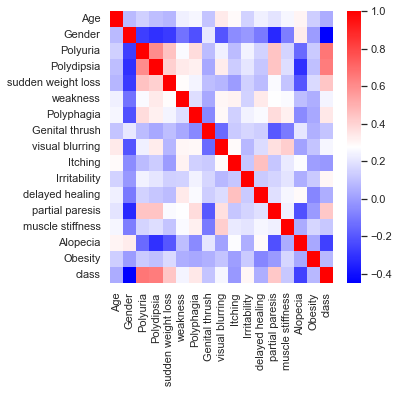

In [8]:
# plotting correlation heatmap
sns.set(rc = {'figure.figsize':(5,5)})
print(type(sns.heatmap(data.corr(), cmap="bwr", annot=False)))

# displaying heatmap
plt.show()

In [9]:
# display the first 10 rows
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,2,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,2,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,2,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,2,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,2,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,2,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### Machine Learning Models
##### *Decision tree and logistic regression models were built becuase they are good algorithms for small datasets

#### Building the decision tree model

In [10]:
# function responsible to create a decision tree based on the dataset you provide
def dtModel(dataset):
    # dividing dataset into X (features, input) and Y (class, output) 
    X = dataset.iloc[:,:len(dataset.columns)-1]
    Y = dataset.iloc[:,len(dataset.columns)-1]
    # splitting dataset intp X and Y train, and X and Y test subsets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
    # creating the classification model by building a decision tree
    dt = tree.DecisionTreeClassifier()
    # adjusting weights according to data values so that better accuracy can be achieved
    dt.fit(X_train, Y_train)

    # testing model and printing the classification report (quality of predictions)
    Y_pred = dt.predict(X_test)
    print(metrics.classification_report(Y_test,Y_pred))
    
    # displaying the confusion matrix on a heatmap
    mat = confusion_matrix(Y_test, Y_pred)
    labels = ['Negative', 'Positive']
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.96      0.95      0.95        78

    accuracy                           0.95       130
   macro avg       0.94      0.95      0.94       130
weighted avg       0.95      0.95      0.95       130



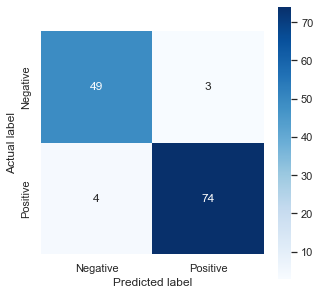

In [11]:
# trying the model
dtModel(data)

#### Decision tree pruning

In [12]:
# measuring k highest scores for each feature to lowering the overfitting
array = data.values
X = array[:,0:len(data.columns)-1]
Y = array[:,len(data.columns)-1]

# Feature extraction
test = SelectKBest(score_func=chi2)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[1.895e-01 3.875e+01 1.162e+02 1.208e+02 5.775e+01 1.272e+01 3.320e+01
 4.914e+00 1.812e+01 4.783e-02 3.533e+01 6.202e-01 5.531e+01 4.875e+00
 2.440e+01 2.250e+00]


In [13]:
# removing featrues that doesn't help in building the tree
dataNew = data.drop(columns=['Age', 'Itching', 'delayed healing', 'Genital thrush', 'muscle stiffness', 'Obesity'])

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.97      0.93      0.95        73

    accuracy                           0.95       130
   macro avg       0.94      0.95      0.95       130
weighted avg       0.95      0.95      0.95       130



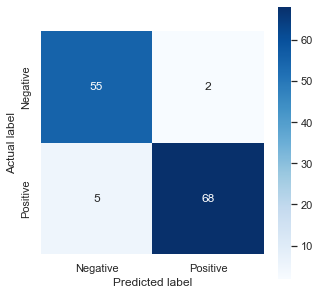

In [14]:
# trying pruned model
dtModel(dataNew)

#### Building a logistic regression model

In [15]:
# function responsible to create a logistic regression model based on the dataset you provide
def logReg(dataset):
    # dividing dataset into X (features, input) and Y (class, output) 
    x = dataset.iloc[:,:len(dataset.columns)-1]
    y = dataset.iloc[:,len(dataset.columns)-1]
    
    # splitting dataset intp X and Y train, and X and Y test subsets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
    
    # creating the classification model
    classifier = LogisticRegression(random_state = 0)
    # adjusting weights according to data values so that better accuracy can be achieved
    classifier.fit(x_train, y_train)
    
    # testing model and printing the classification report (quality of predictions)
    y_pred = classifier.predict(x_test)
    print(metrics.classification_report(y_test,y_pred))

    # displaying the confusion matrix on a heatmap
    mat = confusion_matrix(y_test, y_pred)
    labels = ['Negative', 'Positive']
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')


              precision    recall  f1-score   support

           0       0.96      0.89      0.93        56
           1       0.92      0.97      0.95        74

    accuracy                           0.94       130
   macro avg       0.94      0.93      0.94       130
weighted avg       0.94      0.94      0.94       130



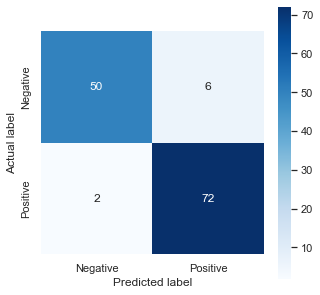

In [16]:
logReg(data)

#### Building a neural network model

In [17]:
# function responsible to create a neural network model based on the dataset you provide
def neuNet(dataset):
    # creating input features and class variables
    X = dataset.iloc[:,0:len(dataset.columns)-1]
    y = dataset.iloc[:,len(dataset.columns)-1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal', input_dim=len(dataset.columns)-1))
    #Second  Hidden Layer
    #classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
    #Output Layer
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    
    #Compiling the neural network
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    
    #Fitting the data to the training dataset
    classifier.fit(X_train,y_train, batch_size=10, epochs=100)
    
    eval_model = classifier.evaluate(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred>0.5)
    
    mat = confusion_matrix(y_test, y_pred)
    labels = ['Negative', 'Positive']
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    #ann_viz(classifier, title="Early stage diabetes risk prediction")

Epoch 1/100
37/37 [==============================] - 1s 1ms/step - loss: 0.6900 - accuracy: 0.6099
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.6209
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.6209
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.6209
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.6209
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.6703
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.6978
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7940
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.8159
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.8104
Epoch 11/

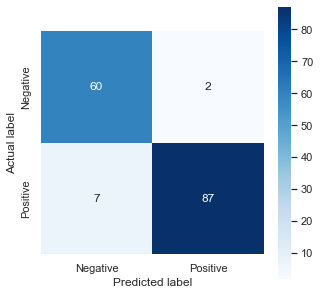

In [18]:
neuNet(data)